# Limpieza de Datos y Análisis Exploratorio de Datos

#### **Librerías**

Importamos las librerías necesarias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import calendar


#### **Lectura del dataset**

Leemos los datos.

In [2]:
df = pd.read_csv('delitos_2022.csv', sep=',')

Mostramos las cinco primeras filas del dataframe.

In [3]:
df.head()

id-mapa  anio        mes        dia       fecha  franja  tipo     subtipo  \
0        1  2022    OCTUBRE    VIERNES  2022-10-14     3.0  Robo  Robo total   
1        2  2022    OCTUBRE     JUEVES  2022-10-27     5.0  Robo  Robo total   
2        3  2022  NOVIEMBRE     MARTES  2022-11-29     0.0  Robo  Robo total   
3        4  2022  NOVIEMBRE      LUNES  2022-11-28     0.0  Robo  Robo total   
4        5  2022  NOVIEMBRE  MIERCOLES  2022-11-30     3.0  Robo  Robo total   

  uso_arma uso_moto     barrio  comuna    latitud   longitud  cantidad  
0       NO       NO  CHACARITA    15.0 -34.584136 -58.454704         1  
1       NO       NO   BARRACAS     4.0 -34.645043 -58.373194         1  
2       NO       NO  CHACARITA    15.0 -34.589982 -58.446471         1  
3       NO       NO  CHACARITA    15.0 -34.588320 -58.441232         1  
4       NO       NO   RECOLETA     2.0 -34.596748 -58.413609         1

#### **Análisis del Dataset**

Consultamos el tamaño del dataset.

In [4]:
df.shape

(140918, 15)

Descripción del Dataset

In [5]:
df.describe()

id-mapa      anio         franja         comuna        latitud  \
count  1.409180e+05  140918.0  140871.000000  138525.000000  138533.000000   
mean   2.444619e+05    2022.0      12.704545       7.375643     -34.613153   
std    3.634805e+05       0.0       6.527667       4.594290       0.046099   
min    1.000000e+00    2022.0       0.000000       1.000000     -34.704440   
25%    3.523025e+04    2022.0       8.000000       3.000000     -34.633741   
50%    7.045950e+04    2022.0      13.000000       7.000000     -34.612143   
75%    1.056888e+05    2022.0      18.000000      12.000000     -34.592638   
max    1.114498e+06    2022.0      23.000000      15.000000     -24.782127   

           longitud  cantidad  
count  1.385330e+05  140918.0  
mean  -1.627240e+01       1.0  
std    1.569328e+04       0.0  
min   -6.542320e+01       1.0  
25%   -5.846911e+01       1.0  
50%   -5.843371e+01       1.0  
75%   -5.840050e+01       1.0  
max    5.840982e+06       1.0

#### **Tipos de Datos**

Tipos de datos de las columnas.

In [6]:
df.dtypes

id-mapa       int64
anio          int64
mes          object
dia          object
fecha        object
franja      float64
tipo         object
subtipo      object
uso_arma     object
uso_moto     object
barrio       object
comuna      float64
latitud     float64
longitud    float64
cantidad      int64
dtype: object

Vemos que la columna fecha tiene como tipo de dato object, cambiamos el tipo de dato a datatime.

In [7]:

df['fecha'] = df['fecha'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))

In [8]:
df.fecha.dtypes

datetime64[ns, UTC]

#### **Valores Nulos y transformación de datos**

Vamos a analizar los datos de cada columna para ver si tienen datos nulos fáciles de encontrar o datos nulos que no se pueden econtrar con isnull, y vamos a inspeccionar los datos para normalizarlos, por ejemplo si en la columna dia hay dos lunes, uno con mayúsculas y otro sin mayúsculas, nos quedarmos con un sólo formato. 

In [9]:
df.isnull().sum()

id-mapa        0
anio           0
mes            0
dia            0
fecha          0
franja        47
tipo           0
subtipo        0
uso_arma       0
uso_moto       0
barrio      2391
comuna      2393
latitud     2385
longitud    2385
cantidad       0
dtype: int64

Podemos ver que las columnas subtipo, uso_armas, barrio y comuna tienen valoes nulos.

##### **Columna barrio**

Analizamos los valores nulos de la columna barrio y comuna.

In [10]:
df[df.barrio.isnull()].comuna.value_counts()

Series([], Name: count, dtype: int64)

In [11]:
df[df.barrio.isnull()].comuna.isnull().sum()

np.int64(2391)

Podemos observar que todas las filas vacías de la columna barrio tienen la columna comuna vacía.  Es decir en las 2584 filas de barrios nulas, no hay el dato correspondiente a comuna. 
Ahora analizamos las columnas latitud y longitud de las mismas filas.

Por lo tanto deberíamos borrar estas filas.

In [12]:
df.dropna(subset=['barrio'], inplace = True)

In [13]:
df.barrio.isnull().sum()

np.int64(0)

In [14]:
df.isnull().sum()

id-mapa     0
anio        0
mes         0
dia         0
fecha       0
franja      1
tipo        0
subtipo     0
uso_arma    0
uso_moto    0
barrio      0
comuna      2
latitud     2
longitud    2
cantidad    0
dtype: int64

In [15]:
df.barrio.value_counts()

barrio
PALERMO              11885
BALVANERA             9426
FLORES                7842
RECOLETA              6327
CABALLITO             6032
VILLA LUGANO          5682
ALMAGRO               5239
SAN NICOLAS           5058
BARRACAS              4590
CONSTITUCION          4555
BELGRANO              4196
VILLA CRESPO          3823
RETIRO                3637
MATADEROS             3264
MONSERRAT             3256
NUEVA POMPEYA         3092
PARQUE CHACABUCO      3079
VILLA SOLDATI         2799
VILLA URQUIZA         2785
LINIERS               2445
VILLA DEVOTO          2444
SAN CRISTOBAL         2388
SAAVEDRA              2385
PARQUE AVELLANEDA     2350
BOCA                  2315
PARQUE PATRICIOS      2193
NUÑEZ                 2140
BOEDO                 2001
SAN TELMO             1915
CHACARITA             1841
FLORESTA              1732
COLEGIALES            1638
VILLA DEL PARQUE      1573
VELEZ SARSFIELD       1242
VILLA PUEYRREDON      1222
VILLA GRAL. MITRE     1195
MONTE CASTRO         

In [16]:
df.shape

(138527, 15)

##### **Columna anio**

In [17]:
df.anio.value_counts()

anio
2022    138527
Name: count, dtype: int64

##### **Columna mes**

In [18]:
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')  # Para sistemas Unix/Linux
# locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252')  # Para Windows

meses = list(calendar.month_name)[1:]
meses = list(map(str.upper, meses))

In [19]:
df.mes.value_counts().loc[meses]

mes
ENERO          9726
FEBRERO        9792
MARZO         11813
ABRIL         11229
MAYO          11028
JUNIO         10554
JULIO         11572
AGOSTO        11962
SEPTIEMBRE    12081
OCTUBRE       12925
NOVIEMBRE     12749
DICIEMBRE     13096
Name: count, dtype: int64

##### **Columna dia**

In [20]:
df.dia.value_counts()

dia
VIERNES      21024
MARTES       20485
JUEVES       20440
MIERCOLES    20308
LUNES        19962
SABADO       19535
DOMINGO      16773
Name: count, dtype: int64

In [21]:
dias = ['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO', 'DOMINGO']

In [22]:
df.dia.value_counts().loc[dias]

dia
LUNES        19962
MARTES       20485
MIERCOLES    20308
JUEVES       20440
VIERNES      21024
SABADO       19535
DOMINGO      16773
Name: count, dtype: int64

##### **Columna franja**

In [23]:
df.franja.isnull().sum()

np.int64(1)

In [24]:
df.dropna(subset=['franja'], inplace = True)

In [25]:
df.franja.value_counts().sort_index()

franja
0.0     7786
1.0     2895
2.0     2422
3.0     2366
4.0     2422
5.0     3248
6.0     4336
7.0     6352
8.0     7116
9.0     6305
10.0    6475
11.0    5981
12.0    7176
13.0    6233
14.0    6438
15.0    6577
16.0    6867
17.0    7424
18.0    7889
19.0    7375
20.0    7520
21.0    6353
22.0    5900
23.0    5070
Name: count, dtype: int64

##### **Columna tipo**

In [26]:
df.tipo.value_counts()

tipo
Robo          56115
Hurto         54112
Lesiones       9622
Amenazas       9405
Vialidad       9185
Homicidios       87
Name: count, dtype: int64

##### **Columna subtipo**

In [27]:
df.subtipo.value_counts()

subtipo
Robo total                        55362
Hurto total                       50071
Lesiones Dolosas                   9622
Amenazas                           9405
Lesiones por siniestros viales     9075
Hurto automotor                    4041
Robo automotor                      753
Muertes por siniestros viales       110
Homicidios dolosos                   82
Femicidios                            5
Name: count, dtype: int64

##### **Columna uso_arma**

In [28]:
df.uso_arma.value_counts()

uso_arma
NO    129903
SI      8623
Name: count, dtype: int64

##### **Columna uso_moto**

In [29]:
df.uso_moto.value_counts()

uso_moto
NO    133477
SI      5049
Name: count, dtype: int64

##### **Columna comuna**

In [30]:
df.comuna.value_counts().sort_index()

comuna
1.0     18926
2.0      6327
3.0     11814
4.0     12190
5.0      7240
6.0      6032
7.0     10921
8.0      9190
9.0      8059
10.0     6477
11.0     6318
12.0     6949
13.0     7974
14.0    11885
15.0     8222
Name: count, dtype: int64

##### **Columnas latitud y longitud**

In [31]:
df.latitud.isnull().sum()

np.int64(2)

In [32]:
df.longitud.isnull().sum()


np.int64(2)

##### **Columna cantidad**

In [33]:
df.cantidad.value_counts()

cantidad
1    138526
Name: count, dtype: int64

In [34]:
df.isnull().sum()

id-mapa     0
anio        0
mes         0
dia         0
fecha       0
franja      0
tipo        0
subtipo     0
uso_arma    0
uso_moto    0
barrio      0
comuna      2
latitud     2
longitud    2
cantidad    0
dtype: int64

In [35]:
df.dtypes

id-mapa                   int64
anio                      int64
mes                      object
dia                      object
fecha       datetime64[ns, UTC]
franja                  float64
tipo                     object
subtipo                  object
uso_arma                 object
uso_moto                 object
barrio                   object
comuna                  float64
latitud                 float64
longitud                float64
cantidad                  int64
dtype: object

Guardo el csv

In [36]:
df.to_csv("../data/delitos2022_procesados_1.csv", index=False)

#### **Estadística Descriptiva**

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138526 entries, 0 to 140917
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype              
---  ------    --------------   -----              
 0   id-mapa   138526 non-null  int64              
 1   anio      138526 non-null  int64              
 2   mes       138526 non-null  object             
 3   dia       138526 non-null  object             
 4   fecha     138526 non-null  datetime64[ns, UTC]
 5   franja    138526 non-null  float64            
 6   tipo      138526 non-null  object             
 7   subtipo   138526 non-null  object             
 8   uso_arma  138526 non-null  object             
 9   uso_moto  138526 non-null  object             
 10  barrio    138526 non-null  object             
 11  comuna    138524 non-null  float64            
 12  latitud   138524 non-null  float64            
 13  longitud  138524 non-null  float64            
 14  cantidad  138526 non-null  int64              
dtypes: da

In [38]:
df.describe()

id-mapa      anio         franja         comuna        latitud  \
count  1.385260e+05  138526.0  138526.000000  138524.000000  138524.000000   
mean   2.355523e+05    2022.0      12.703875       7.375689     -34.613297   
std    3.576791e+05       0.0       6.526004       4.594274       0.030833   
min    1.000000e+00    2022.0       0.000000       1.000000     -34.704440   
25%    3.476325e+04    2022.0       8.000000       3.000000     -34.633741   
50%    6.954650e+04    2022.0      13.000000       7.000000     -34.612143   
75%    1.042668e+05    2022.0      18.000000      12.000000     -34.592638   
max    1.114498e+06    2022.0      23.000000      15.000000     -34.528793   

            longitud  cantidad  
count  138524.000000  138526.0  
mean      -58.435815       1.0  
std         0.042609       0.0  
min       -58.531473       1.0  
25%       -58.469107       1.0  
50%       -58.433704       1.0  
75%       -58.400498       1.0  
max       -58.341961       1.0

In [39]:
df.head()

id-mapa  anio        mes        dia                     fecha  franja  \
0        1  2022    OCTUBRE    VIERNES 2022-10-14 00:00:00+00:00     3.0   
1        2  2022    OCTUBRE     JUEVES 2022-10-27 00:00:00+00:00     5.0   
2        3  2022  NOVIEMBRE     MARTES 2022-11-29 00:00:00+00:00     0.0   
3        4  2022  NOVIEMBRE      LUNES 2022-11-28 00:00:00+00:00     0.0   
4        5  2022  NOVIEMBRE  MIERCOLES 2022-11-30 00:00:00+00:00     3.0   

   tipo     subtipo uso_arma uso_moto     barrio  comuna    latitud  \
0  Robo  Robo total       NO       NO  CHACARITA    15.0 -34.584136   
1  Robo  Robo total       NO       NO   BARRACAS     4.0 -34.645043   
2  Robo  Robo total       NO       NO  CHACARITA    15.0 -34.589982   
3  Robo  Robo total       NO       NO  CHACARITA    15.0 -34.588320   
4  Robo  Robo total       NO       NO   RECOLETA     2.0 -34.596748   

    longitud  cantidad  
0 -58.454704         1  
1 -58.373194         1  
2 -58.446471         1  
3 -58.441232         1  
4 -58.413609         1

Text(0, 0.5, 'Número de delitos')

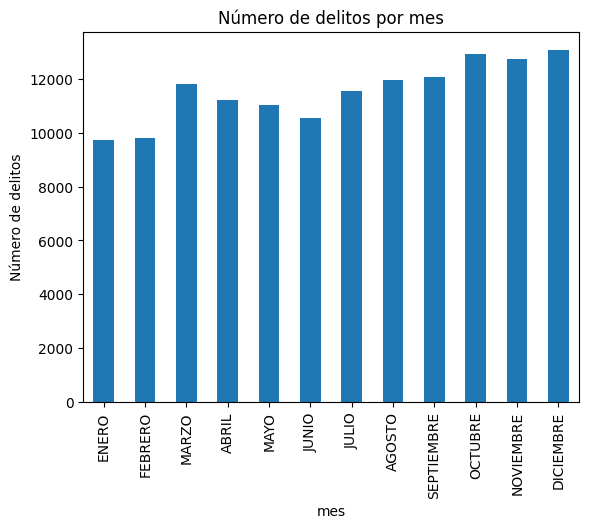

In [40]:
df.mes.value_counts().loc[meses].plot(kind='bar')
plt.title("Número de delitos por mes")
plt.ylabel("Número de delitos")

Text(0, 0.5, 'Número de delitos')

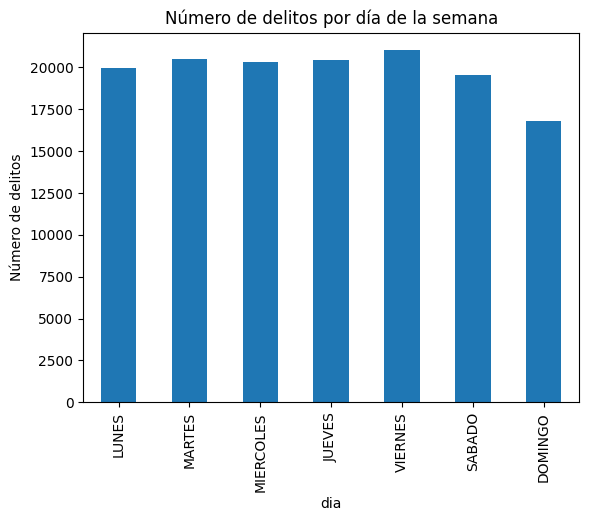

In [41]:
df.dia.value_counts().loc[dias].plot(kind='bar')
plt.title("Número de delitos por día de la semana")
plt.ylabel("Número de delitos")

Text(0, 0.5, 'Número de delitos')

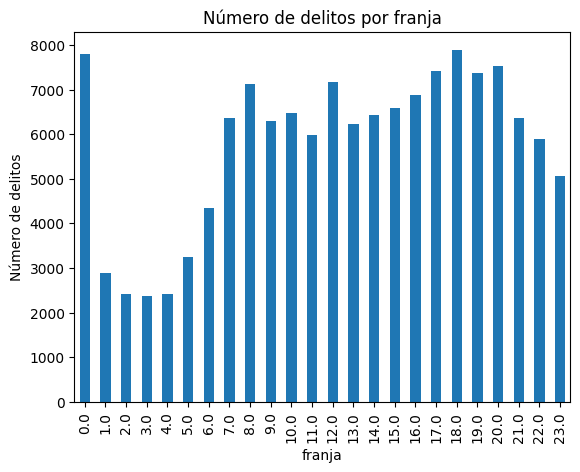

In [42]:
df.franja.value_counts().sort_index().plot(kind='bar')
plt.title("Número de delitos por franja")
plt.ylabel("Número de delitos")

Text(0, 0.5, 'Número de delitos')

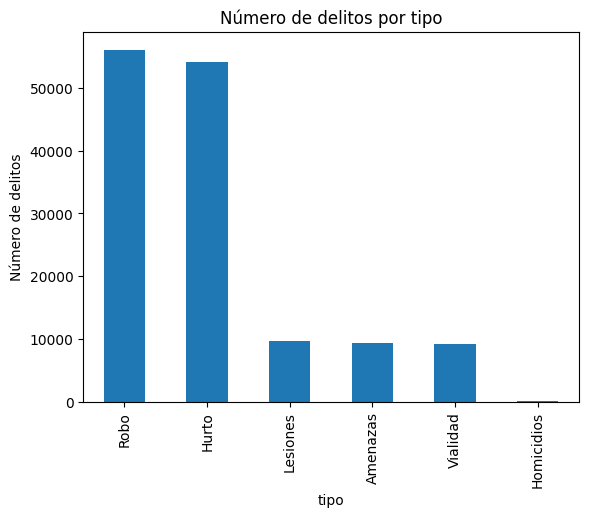

In [43]:
df.tipo.value_counts().plot(kind='bar')
plt.title("Número de delitos por tipo")
plt.ylabel("Número de delitos")

Text(0, 0.5, 'Número de delitos')

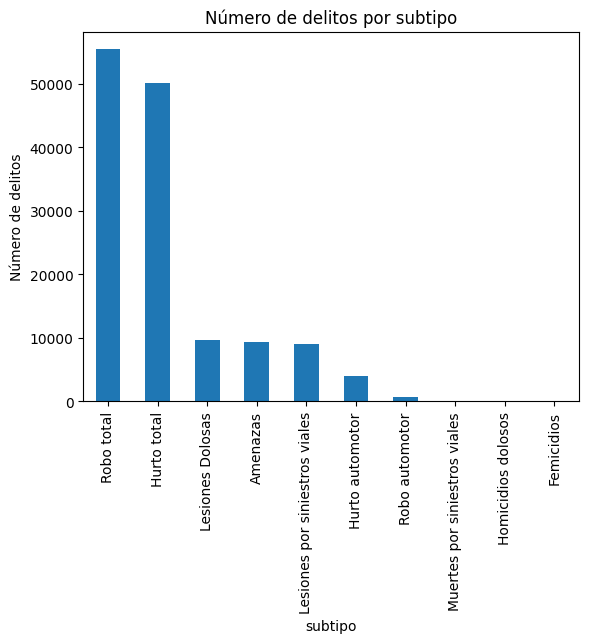

In [44]:
df.subtipo.value_counts().plot(kind='bar')
plt.title("Número de delitos por subtipo")
plt.ylabel("Número de delitos")

Text(0, 0.5, '')

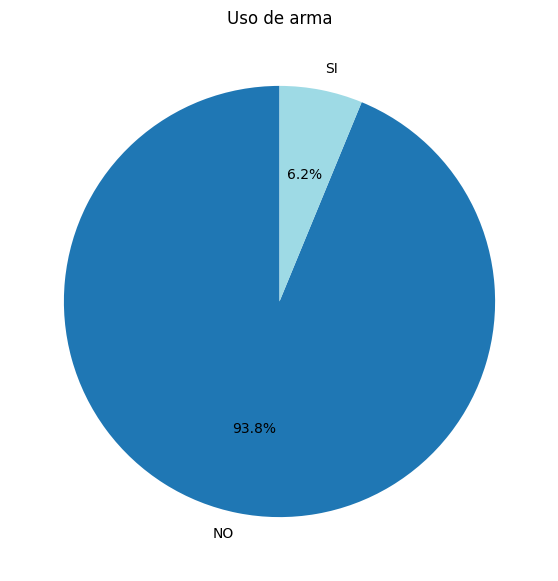

In [45]:
df.uso_arma.value_counts().plot(kind='pie',
                            autopct='%1.1f%%',  # Muestra los porcentajes
                            startangle=90,      # Girar el gráfico para mejor visualización
                            cmap='tab20',        # Cambiar colores
                            figsize=(7,7))
plt.title("Uso de arma")
plt.ylabel("")  


Text(0, 0.5, '')

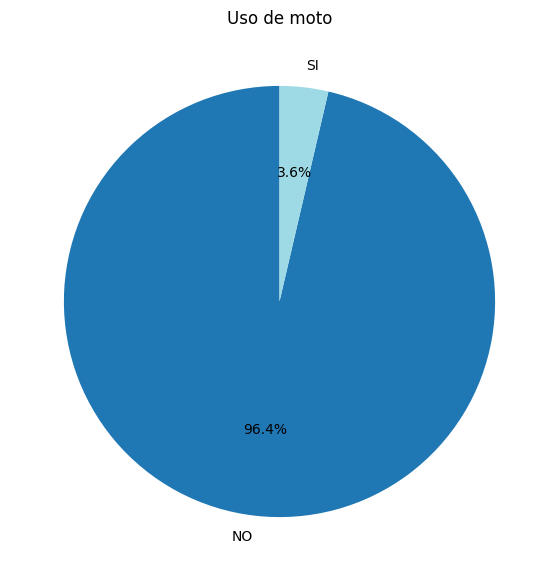

In [46]:
df.uso_moto.value_counts().plot(kind='pie',
                            autopct='%1.1f%%',  # Muestra los porcentajes
                            startangle=90,      # Girar el gráfico para mejor visualización
                            cmap='tab20',        # Cambiar colores
                            figsize=(7,7))
plt.title("Uso de moto")
plt.ylabel("") 


Text(0, 0.5, 'Número de delitos')

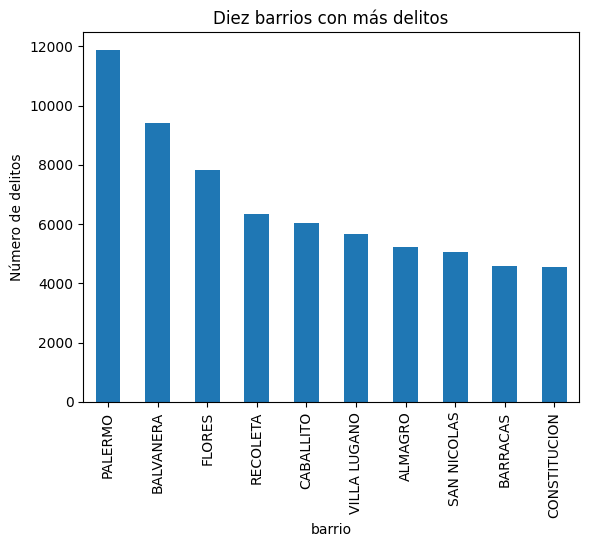

In [47]:
df.barrio.value_counts().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title("Diez barrios con más delitos")
plt.ylabel("Número de delitos")

Text(0, 0.5, 'Número de delitos')

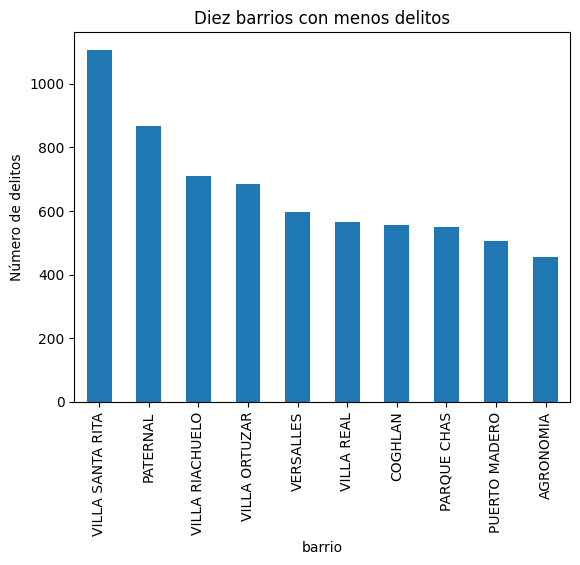

In [48]:
df.barrio.value_counts().sort_values(ascending=False)[-10:].plot(kind='bar')
plt.title("Diez barrios con menos delitos")
plt.ylabel("Número de delitos")

Text(0, 0.5, 'Número de delitos por comuna')

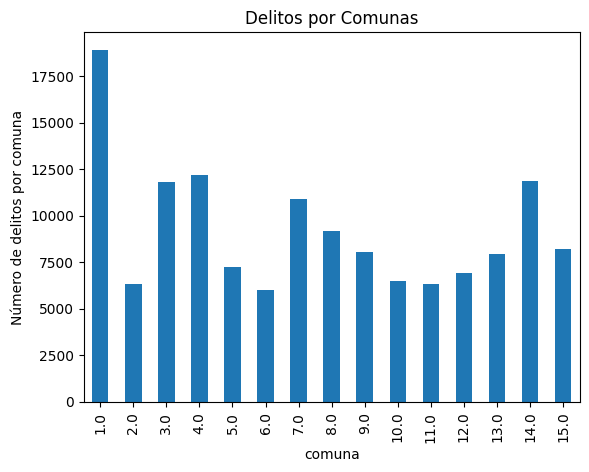

In [49]:
df.comuna.value_counts().sort_index().plot(kind='bar')
plt.title("Delitos por Comunas")
plt.ylabel("Número de delitos por comuna")

#### **Mapa de Calor de Delitos en ls ciudad de Buenos Aires**

In [50]:
import branca
import folium
from folium.plugins import HeatMap

# Crear mapa centrado en Buenos Aires
mapa = folium.Map(location=[-34.6037, -58.3816], zoom_start=11)

# Agregar capa de calor con las ubicaciones del delito
heat_data = df[['latitud', 'longitud', 'cantidad']].dropna().values
HeatMap(heat_data, radius=12).add_to(mapa)


mapa


En el mapa podemos ver que las regiones más naranjas son los lugares donde se comenten más delitos, seguidas por las amarillas y luego por las verdes.

#### Barrios de cada comuna

In [51]:
comuna_barrio = df.groupby('comuna')['barrio'].apply(lambda x: list(set(x))).reset_index()

In [52]:
pd.set_option('display.max_colwidth', None)

In [53]:
comuna_barrio

comuna  \
0      1.0   
1      2.0   
2      3.0   
3      4.0   
4      5.0   
5      6.0   
6      7.0   
7      8.0   
8      9.0   
9     10.0   
10    11.0   
11    12.0   
12    13.0   
13    14.0   
14    15.0   

                                                                          barrio  
0       [PUERTO MADERO, SAN NICOLAS, MONSERRAT, SAN TELMO, RETIRO, CONSTITUCION]  
1                                                                     [RECOLETA]  
2                                                     [SAN CRISTOBAL, BALVANERA]  
3                              [NUEVA POMPEYA, PARQUE PATRICIOS, BOCA, BARRACAS]  
4                                                               [BOEDO, ALMAGRO]  
5                                                                    [CABALLITO]  
6                                                     [PARQUE CHACABUCO, FLORES]  
7                                 [VILLA SOLDATI, VILLA RIACHUELO, VILLA LUGANO]  
8                                        [MATADEROS, LINIERS, PARQUE AVELLANEDA]  
9   [FLORESTA, VERSALLES, VELEZ SARSFIELD, VILLA REAL, VILLA LURO, MONTE CASTRO]  
10         [VILLA GRAL. MITRE, VILLA SANTA RITA, VILLA DEL PARQUE, VILLA DEVOTO]  
11                          [COGHLAN, VILLA PUEYRREDON, SAAVEDRA, VILLA URQUIZA]  
12                                                 [BELGRANO, COLEGIALES, NUÑEZ]  
13                                                                     [PALERMO]  
14    [PATERNAL, CHACARITA, VILLA ORTUZAR, AGRONOMIA, VILLA CRESPO, PARQUE CHAS]

#### Sutipos de cada tipo de delito

In [54]:
tipo_subtipo = df.groupby('tipo')['subtipo'].apply(lambda x: list(set(x))).reset_index()

In [55]:
tipo_subtipo

tipo                                                          subtipo
0    Amenazas                                                       [Amenazas]
1  Homicidios                                 [Homicidios dolosos, Femicidios]
2       Hurto                                   [Hurto automotor, Hurto total]
3    Lesiones                                               [Lesiones Dolosas]
4        Robo                                     [Robo automotor, Robo total]
5    Vialidad  [Lesiones por siniestros viales, Muertes por siniestros viales]

#### **Detección de Outliers en la Cantidad de Delitos por Barrio**

<Axes: >

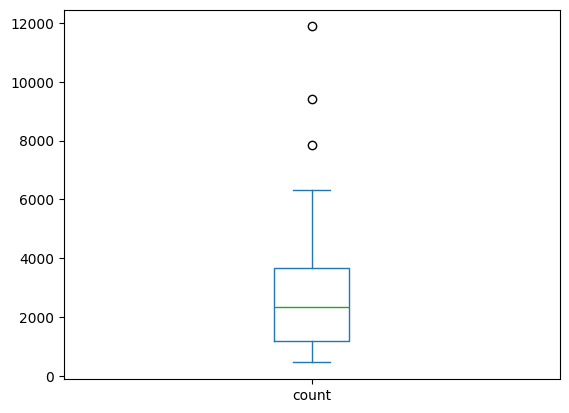

In [56]:
df.barrio.value_counts().plot(kind='box')

Podemos ver en el gráfico que si hay outliers.

#### **Detección de Outliers en la Cantidad de Delitos por Comuna**

<Axes: >

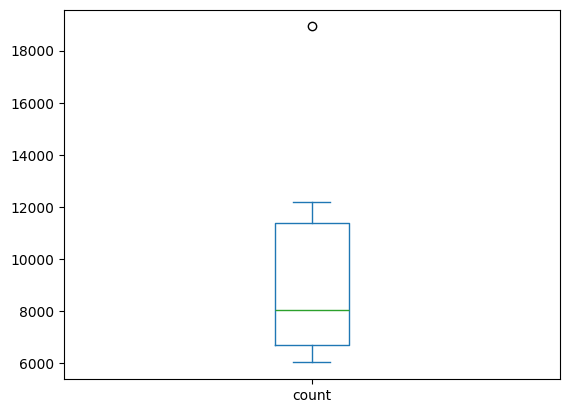

In [57]:
df.comuna.value_counts().plot(kind='box')

In [58]:
df.columns

Index(['id-mapa', 'anio', 'mes', 'dia', 'fecha', 'franja', 'tipo', 'subtipo',
       'uso_arma', 'uso_moto', 'barrio', 'comuna', 'latitud', 'longitud',
       'cantidad'],
      dtype='object')

En este caso los datos están distribuidos de manera más uniforme

#### **Tabulación cruzada**

In [59]:
df_tipo_mes = pd.crosstab(df["tipo"], df["mes"])[meses]
df_tipo_mes


mes         ENERO  FEBRERO  MARZO  ABRIL  MAYO  JUNIO  JULIO  AGOSTO  \
tipo                                                                   
Amenazas      826      797    951    830   833    651    667     767   
Homicidios      8        3      7      6     7      5      9       3   
Hurto        3415     3407   4187   4162  4063   4250   4593    4787   
Lesiones      968      875   1108    892   785    591    648     688   
Robo         3940     4099   4708   4445  4490   4269   4960    4952   
Vialidad      569      611    852    894   850    788    695     765   

mes         SEPTIEMBRE  OCTUBRE  NOVIEMBRE  DICIEMBRE  
tipo                                                   
Amenazas           793      757        769        764  
Homicidios          10       10          9         10  
Hurto             4758     5248       5403       5839  
Lesiones           678      755        787        847  
Robo              4996     5339       5020       4897  
Vialidad           845      816        761        739

In [60]:
df_tipo_dia = (pd.crosstab(df["dia"], df["tipo"])).loc[dias]
df_tipo_dia

tipo       Amenazas  Homicidios  Hurto  Lesiones  Robo  Vialidad
dia                                                             
LUNES          1476           9   7572      1419  8093      1393
MARTES         1428           9   8099      1319  8221      1409
MIERCOLES      1485          12   7818      1381  8132      1480
JUEVES         1514          13   8013      1333  8152      1415
VIERNES        1408          10   8285      1374  8437      1509
SABADO         1073          18   8030      1413  7867      1134
DOMINGO        1021          16   6295      1383  7213       845

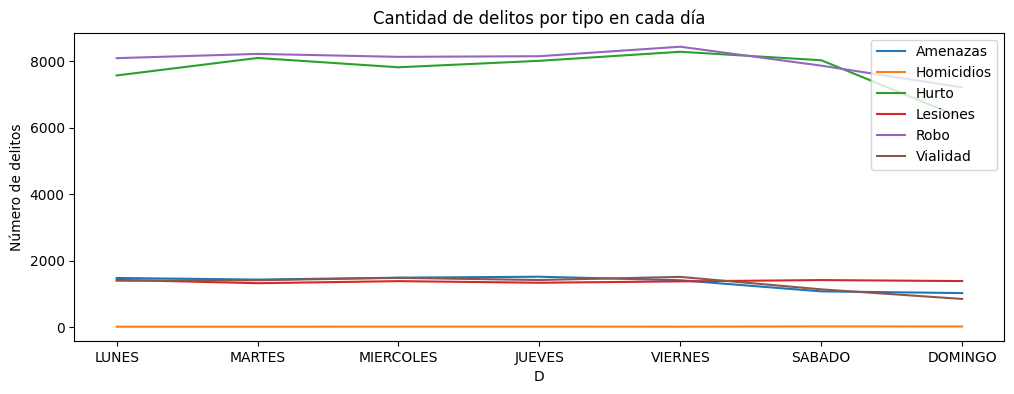

In [61]:
plt.figure(figsize=(12, 4))
for tipo in df_tipo_dia.columns:
    plt.plot(df_tipo_dia.index, df_tipo_dia[tipo], label=tipo)
plt.xlabel('D')  # Eje X: Meses
plt.ylabel('Número de delitos')  # Eje Y: Número de delitos
plt.title('Cantidad de delitos por tipo en cada día')
plt.legend(loc='upper right')

Podemos observar que los delitos como robo, hurto y vialidad reducen el sábado y domingo, mientras que lesiones, amenazas y homicidios se mantienen estables a lo largo de la semana.

In [62]:
df_comuna_mes = pd.crosstab(df["comuna"], df["mes"])[meses]
df_comuna_mes


mes     ENERO  FEBRERO  MARZO  ABRIL  MAYO  JUNIO  JULIO  AGOSTO  SEPTIEMBRE  \
comuna                                                                         
1.0      1143     1303   1469   1466  1549   1451   1601    1541        1560   
2.0       413      457    621    548   493    498    565     561         550   
3.0       805      853   1028    889   911    901   1006    1008        1066   
4.0       966      892   1099    987  1003    882    943    1082        1023   
5.0       562      511    636    569   613    526    611     613         625   
6.0       425      428    492    485   471    528    560     505         542   
7.0       775      767    938    875   890    850    986    1031        1012   
8.0       665      627    800    792   743    699    703     724         799   
9.0       595      558    684    640   562    564    594     710         696   
10.0      464      447    580    511   483    471    548     571         556   
11.0      441      403    508    553   481    495    556     562         561   
12.0      491      498    606    551   604    587    597     618         590   
13.0      554      588    631    621   633    612    702     707         769   
14.0      878      899   1046   1038   946    839    961     975        1023   
15.0      549      561    674    704   646    650    639     754         708   

mes     OCTUBRE  NOVIEMBRE  DICIEMBRE  
comuna                                 
1.0        1684       1876       2283  
2.0         565        523        533  
3.0        1103       1159       1085  
4.0        1139       1086       1088  
5.0         678        646        650  
6.0         552        553        491  
7.0         931        900        966  
8.0         925        788        925  
9.0         795        833        828  
10.0        602        604        640  
11.0        567        614        577  
12.0        649        574        584  
13.0        799        736        622  
14.0       1170       1059       1051  
15.0        766        798        773

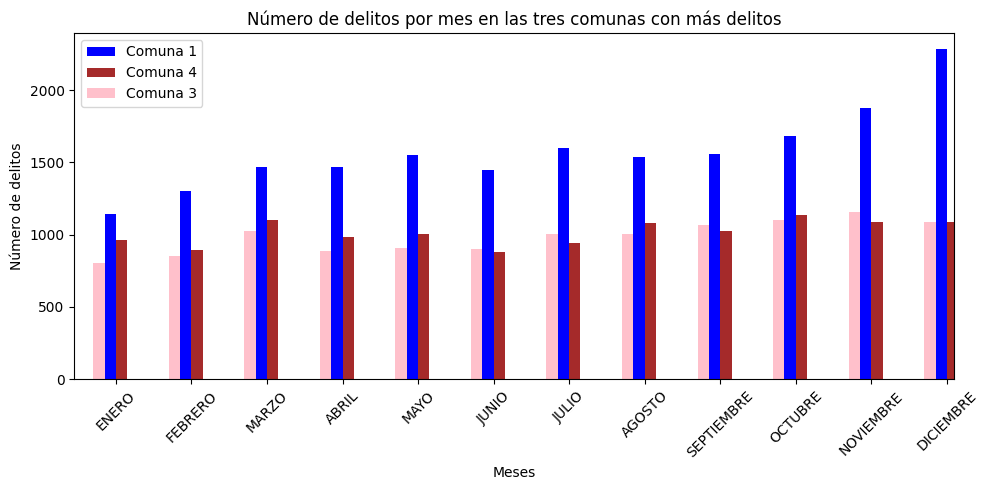

In [63]:
plt.figure(figsize=(10, 5))  

# Graficar 
df_comuna_mes.iloc[0].plot(kind='bar', position=1, width=0.15, label='Comuna 1', color='blue')

df_comuna_mes.iloc[3].plot(kind='bar', position=0, width=0.15, label='Comuna 4', color='brown')

df_comuna_mes.iloc[2].plot(kind='bar', position=2, width=0.15, label='Comuna 3', color='pink')

plt.xlabel('Meses')  
plt.ylabel('Número de delitos')  
plt.title('Número de delitos por mes en las tres comunas con más delitos') 
plt.legend()  

plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

En el gráfico podemos observar como en noviembre aumentan los delitos en la Comuna 1 en comparación con octubre, mientras en las comunas 3 y 4 no aumentan tanto.

In [64]:
df.uso_arma.value_counts()

uso_arma
NO    129903
SI      8623
Name: count, dtype: int64

In [65]:
df[df['uso_arma'] == "SI"].tipo.value_counts()

tipo
Robo    8623
Name: count, dtype: int64

In [66]:
df[df['uso_arma'] == "SI"].subtipo.value_counts()

subtipo
Robo total        8057
Robo automotor     566
Name: count, dtype: int64

Podemos observar que las armas se usan para el tipo de delito robos y los subtipos Robo total y Robo automotor.

In [67]:
df[df['uso_moto'] == "SI"].tipo.value_counts()

tipo
Robo    5049
Name: count, dtype: int64

In [68]:
df[df['uso_moto'] == "SI"].subtipo.value_counts()

subtipo
Robo total    5049
Name: count, dtype: int64

Podemos observar que las motos se usan para el tipo de delito Robo, y el subtipo Robo Total.

In [69]:
df.tipo.value_counts()

tipo
Robo          56115
Hurto         54112
Lesiones       9622
Amenazas       9405
Vialidad       9185
Homicidios       87
Name: count, dtype: int64

In [70]:
df_tipo_franja = pd.crosstab(df["tipo"], df["franja"])
df_tipo_franja


franja      0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   ...  \
tipo                                                                    ...   
Amenazas    1484   192   119    99    77    71    73   119   248   290  ...   
Homicidios     1     4     3     3     2     5     3     1     5     1  ...   
Hurto       2629  1029   876   885   824  1020  1552  2675  3289  2902  ...   
Lesiones     432   291   227   244   290   306   309   337   315   351  ...   
Robo        3016  1255  1114  1072  1172  1718  2201  2878  2838  2305  ...   
Vialidad     224   124    83    63    57   128   198   342   421   456  ...   

franja      14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  
tipo                                                                    
Amenazas     505   490   526   542   552   527   534   451   385   338  
Homicidios     2     5     0     4     6     3     3     9     7     4  
Hurto       2664  2619  2620  3006  3159  2633  2407  2031  2054  1931  
Lesiones     419   440   489   477   532   523   562   499   481   366  
Robo        2233  2427  2566  2754  3015  3202  3571  2967  2662  2235  
Vialidad     615   596   666   641   625   487   443   396   311   196  

[6 rows x 24 columns]

Text(0, 0.5, 'Número de delitos')

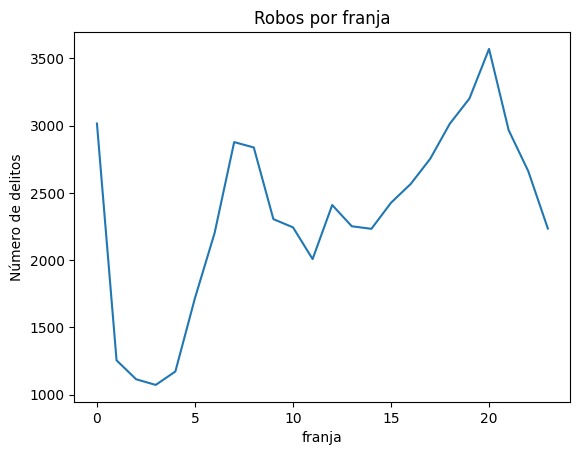

In [71]:
df_tipo_franja.loc['Robo'].plot()
plt.title("Robos por franja")
plt.ylabel("Número de delitos")

Podemos observar que el delito más cometido, el robo, se produce más en las noches, siendo las 20 horas la hora en que más casos se dan.

Text(0, 0.5, 'Número de delitos')

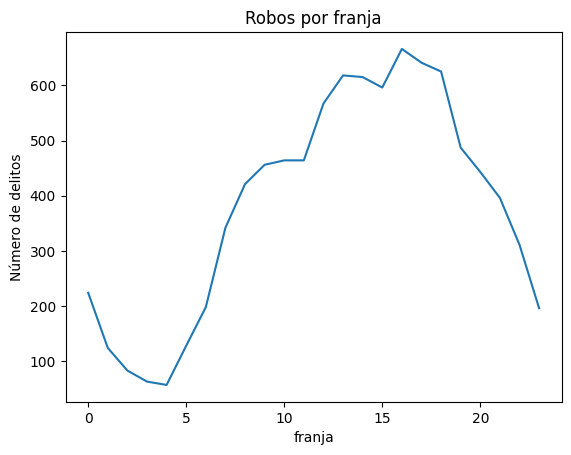

In [72]:
df_tipo_franja.loc['Vialidad'].plot()
plt.title("Robos por franja")
plt.ylabel("Número de delitos")

Podemos observar que los delitos relacionados con la vialidad tienen su pico a partir de las 12 horas hasta las 17 horas.